In [1]:

from utils.__init__ import *


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.core.pylabtools import figsize

In [2]:
SIZE_X = 14
SIZE_Y = 7
figsize(SIZE_X, SIZE_Y)

Считаю что в классы нумеруются \[1,  N\],

In [3]:
df = pd.read_csv("data/wine.csv")
df.head(10)

,class,Alcohol,Malic_acid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,OD280%2FOD315_of_diluted_wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
5,1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450
6,1,14.39,1.87,2.45,14.6,96,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290
7,1,14.06,2.15,2.61,17.6,121,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295
8,1,14.83,1.64,2.17,14.0,97,2.80,2.98,0.29,1.98,5.20,1.08,2.85,1045
9,1,13.86,1.35,2.27,16.0,98,2.98,3.15,0.22,1.85,7.22,1.01,3.55,1045


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   class                           178 non-null    int64  
 1   Alcohol                         178 non-null    float64
 2   Malic_acid                      178 non-null    float64
 3   Ash                             178 non-null    float64
 4   Alcalinity_of_ash               178 non-null    float64
 5   Magnesium                       178 non-null    int64  
 6   Total_phenols                   178 non-null    float64
 7   Flavanoids                      178 non-null    float64
 8   Nonflavanoid_phenols            178 non-null    float64
 9   Proanthocyanins                 178 non-null    float64
 10  Color_intensity                 178 non-null    float64
 11  Hue                             178 non-null    float64
 12  OD280%2FOD315_of_diluted_wines  178 

In [5]:
count_of_classes = get_count(df, 'class')

In [6]:
oneHot_df = one_hot(normalize(df, 'class'), 'class')

In [7]:
oneHot_df.head()

,Alcohol,Malic_acid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,OD280%2FOD315_of_diluted_wines,Proline,class_1,class_2,class_3
0,0.842105,0.191700,0.572193,0.257732,0.619565,0.627586,0.573840,0.283019,0.593060,0.372014,0.455285,0.970696,0.561341,1,0,0
1,0.571053,0.205534,0.417112,0.030928,0.326087,0.575862,0.510549,0.245283,0.274448,0.264505,0.463415,0.780220,0.550642,1,0,0
2,0.560526,0.320158,0.700535,0.412371,0.336957,0.627586,0.611814,0.320755,0.757098,0.375427,0.447154,0.695971,0.646933,1,0,0
3,0.878947,0.239130,0.609626,0.319588,0.467391,0.989655,0.664557,0.207547,0.558360,0.556314,0.308943,0.798535,0.857347,1,0,0
4,0.581579,0.365613,0.807487,0.536082,0.521739,0.627586,0.495781,0.490566,0.444795,0.259386,0.455285,0.608059,0.325963,1,0,0


In [8]:
data, targets = split_target(oneHot_df, count_of_classes)

In [9]:
distance_functions = [manhattan_d, euclidean_d, chebyshev_d]
kernel_functions = [uniform_f, triangular_f, epanechnikov_f, quartic_f]

In [10]:
l_o_o = LeaveOneOut(distance_functions, kernel_functions) # переменная улиточка, с двумя панцирями

In [11]:
l_o_o.fit(data, targets)

In [12]:
max_F_score = l_o_o.predict()

100%|██████████| 24/24 [02:53<00:00,  7.21s/it]

----------
Distance: manhattan_d
Kernel: epanechnikov_f
Window Type: fixed
Window Width: 1.883507398023107
max F score: 0.9831896868358531


In [13]:
F_Scores = []
sqrt_D = np.sqrt(len(data))

if l_o_o.best_window_type == "variable":
    windows = [i for i in range(1, int(np.ceil(sqrt_D)))]  # [1, sqrt_D]
else:
    R_D = max(
        l_o_o.best_distance_function(x, y)
        for x, y in itertools.product(data, data))
    R_D_Div = R_D / sqrt_D
    windows = [R_D_Div * i for i in
               range(1, int(np.ceil(sqrt_D)))]  # [ R_D_Div, R_D ] с шагом R_D_Div
for window in windows:
    F_Scores.append((window, regression(data, targets, l_o_o.best_distance_function,
                         l_o_o.best_kernel_function, l_o_o.best_window_type, window)))
print(F_Scores)

[(0.47087684950577674, 0.570281124497992), (0.9417536990115535, 0.7566976543384983), (1.4126305485173303, 0.9719228459490344), (1.883507398023107, 0.9831896868358531), (2.3543842475288836, 0.9720991158988903), (2.8252610970346606, 0.9665526461090975), (3.296137946540437, 0.9720253509339627), (3.767014796046214, 0.972004307594875), (4.237891645551991, 0.9263969345362015), (4.708768495057767, 0.8583337677359355), (5.179645344563544, 0.801041856029136), (5.650522194069321, 0.722129778914481), (6.121399043575098, 0.6773984442523768)]


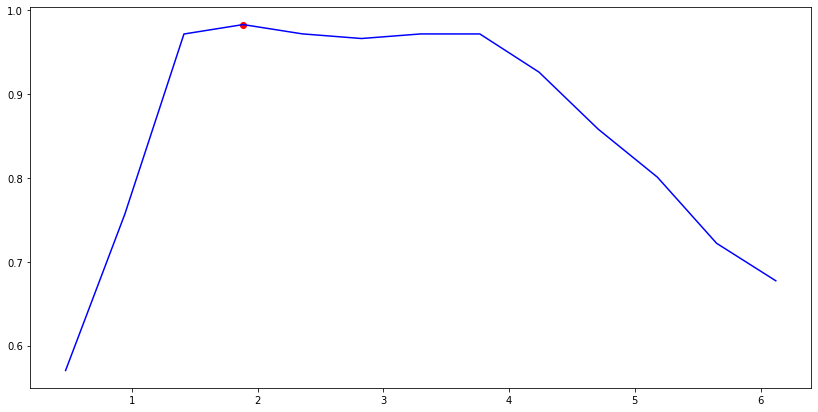

In [14]:
x = [x[0] for x in F_Scores]
y = [x[1] for x in F_Scores]

plt.plot(x, y, 'b')
plt.scatter(l_o_o.best_window, max_F_score, color='red')
plt.show()